In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d blastchar/telco-customer-churn
!unzip telco-customer-churn.zip

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 36.6MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.duplicated().any()

False

In [ ]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


# Preprocessing

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [ ]:
df['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


<Axes: >

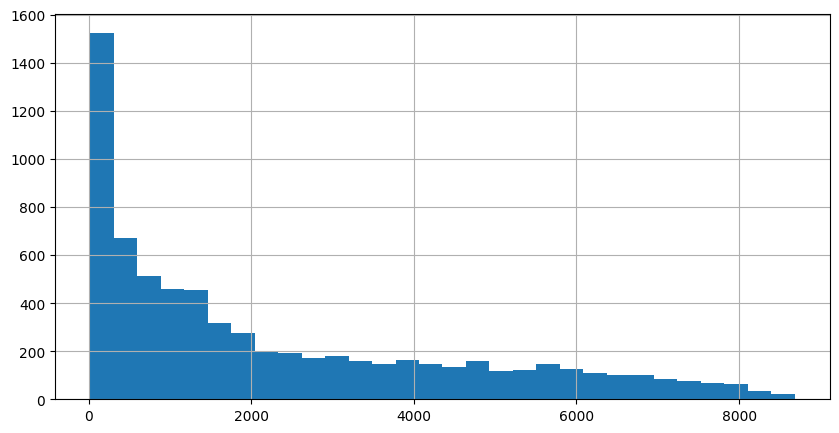

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
import matplotlib.pyplot as plt
df['TotalCharges'].hist(figsize=(10, 5), bins=30)

In [ ]:
print(len(df[df['TotalCharges']=='  ']))

0


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())


In [ ]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.columns=df.columns.str.lower().str.replace(' ','-')

In [ ]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [ ]:
df.churn=(df.churn == 'Yes').astype(int)

In [ ]:
df['seniorcitizen']=df['seniorcitizen'].astype('object')

In [ ]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_valid = train_test_split(df_full_train, test_size=0.2, random_state=1)
print("Training Data Size: ", df_train.shape)
print("Validation Data Size: ", df_valid.shape)
print("Testing Data Size: ", df_test.shape)

Training Data Size:  (4507, 20)
Validation Data Size:  (1127, 20)
Testing Data Size:  (1409, 20)


In [ ]:
categorical = list(df_train.select_dtypes(include=['object']).columns)
numerical = list(df_train.select_dtypes(include=['number']).columns)

In [ ]:

numerical

['tenure', 'monthlycharges', 'totalcharges', 'churn']

In [ ]:
numerical.remove('churn')

In [ ]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [ ]:
global_mean = df_train.churn.mean()
round(global_mean , 2)

0.27

In [ ]:
chrun_gender = df_train.groupby('gender').churn.mean()
print (chrun_gender)


gender
Female    0.274258
Male      0.261778
Name: churn, dtype: float64


In [ ]:
chrun_partner = df_train.groupby('partner').churn.mean()
print(chrun_partner)

partner
No     0.325838
Yes    0.204651
Name: churn, dtype: float64


In [ ]:
from IPython.display import display

for feature in categorical:
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).copy()
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    print(f"Feature: {feature}")
    display(df_group)


Feature: gender


,mean,diff,risk
gender,,,
Female,0.274258,0.00623,1.023245
Male,0.261778,-0.00625,0.976682


Feature: seniorcitizen


,mean,diff,risk
seniorcitizen,,,
0,0.241700,-0.026328,0.901773
1,0.401617,0.133590,1.498418


Feature: partner


,mean,diff,risk
partner,,,
No,0.325838,0.057810,1.215688
Yes,0.204651,-0.063376,0.763545


Feature: dependents


,mean,diff,risk
dependents,,,
No,0.312599,0.044572,1.166295
Yes,0.164454,-0.103573,0.613572


Feature: phoneservice


,mean,diff,risk
phoneservice,,,
No,0.249438,-0.018589,0.930644
Yes,0.270064,0.002036,1.007598


Feature: multiplelines


,mean,diff,risk
multiplelines,,,
No,0.253358,-0.014669,0.945269
No phone service,0.249438,-0.018589,0.930644
Yes,0.289017,0.020990,1.078312


Feature: internetservice


,mean,diff,risk
internetservice,,,
DSL,0.195232,-0.072796,0.728403
Fiber optic,0.421779,0.153752,1.573641
No,0.080080,-0.187947,0.298776


Feature: onlinesecurity


,mean,diff,risk
onlinesecurity,,,
No,0.419964,0.151937,1.566869
No internet service,0.080080,-0.187947,0.298776
Yes,0.151090,-0.116937,0.563712


Feature: onlinebackup


,mean,diff,risk
onlinebackup,,,
No,0.396020,0.127992,1.477535
No internet service,0.080080,-0.187947,0.298776
Yes,0.221629,-0.046399,0.826888


Feature: deviceprotection


,mean,diff,risk
deviceprotection,,,
No,0.392514,0.124486,1.464454
No internet service,0.080080,-0.187947,0.298776
Yes,0.229915,-0.038112,0.857804


Feature: techsupport


,mean,diff,risk
techsupport,,,
No,0.416554,0.148526,1.554145
No internet service,0.080080,-0.187947,0.298776
Yes,0.159599,-0.108428,0.595458


Feature: streamingtv


,mean,diff,risk
streamingtv,,,
No,0.344674,0.076646,1.285964
No internet service,0.080080,-0.187947,0.298776
Yes,0.297376,0.029349,1.109498


Feature: streamingmovies


,mean,diff,risk
streamingmovies,,,
No,0.338609,0.070582,1.263338
No internet service,0.080080,-0.187947,0.298776
Yes,0.304198,0.036170,1.134950


Feature: contract


,mean,diff,risk
contract,,,
Month-to-month,0.432509,0.164482,1.613674
One year,0.115822,-0.152205,0.432128
Two year,0.027027,-0.241000,0.100837


Feature: paperlessbilling


,mean,diff,risk
paperlessbilling,,,
No,0.171566,-0.096462,0.640106
Yes,0.336495,0.068467,1.255448


Feature: paymentmethod


,mean,diff,risk
paymentmethod,,,
Bank transfer (automatic),0.164622,-0.103406,0.614197
Credit card (automatic),0.175620,-0.092408,0.655231
Electronic check,0.441215,0.173188,1.646157
Mailed check,0.199618,-0.068410,0.744767


<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


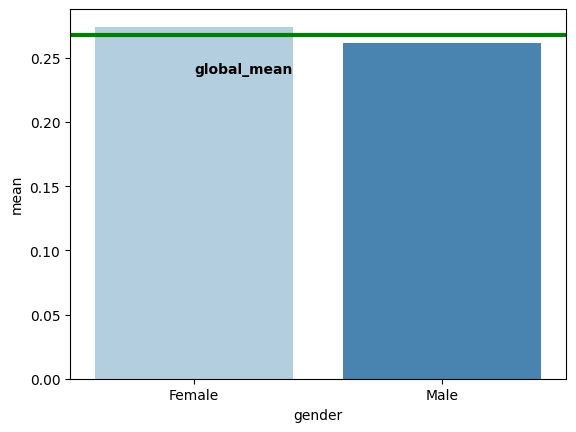

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


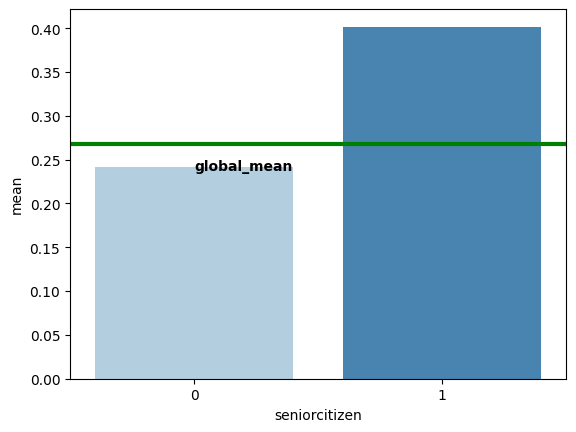

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


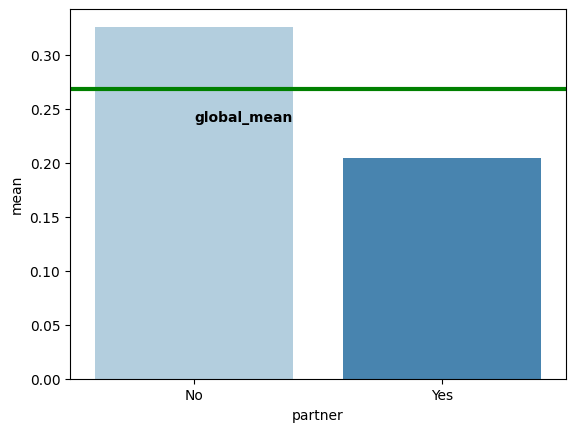

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


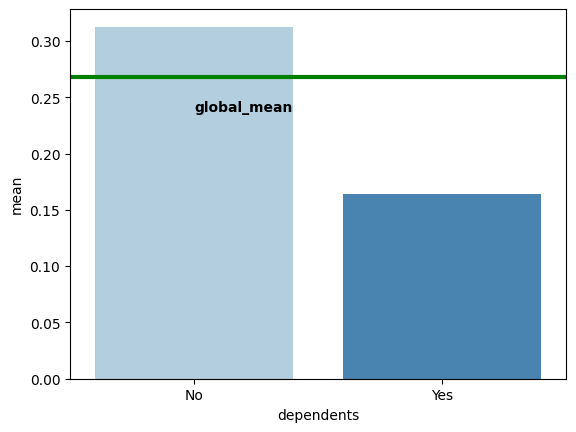

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


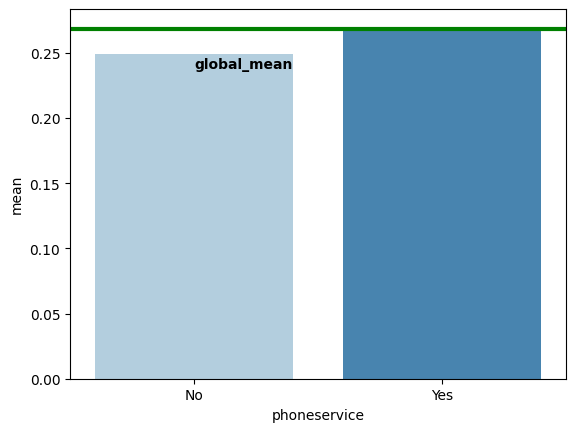

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


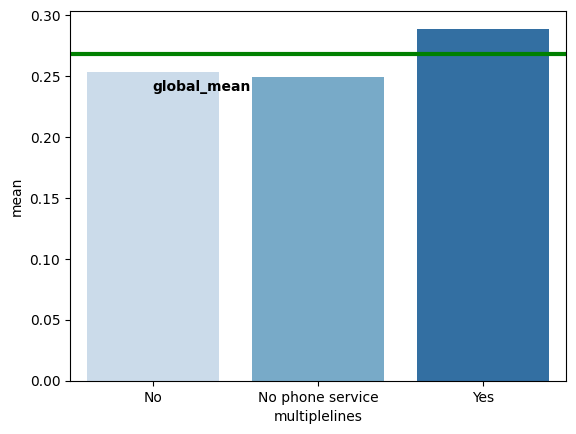

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


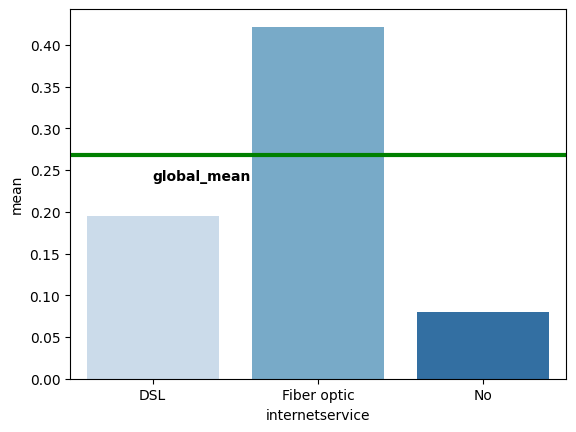

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


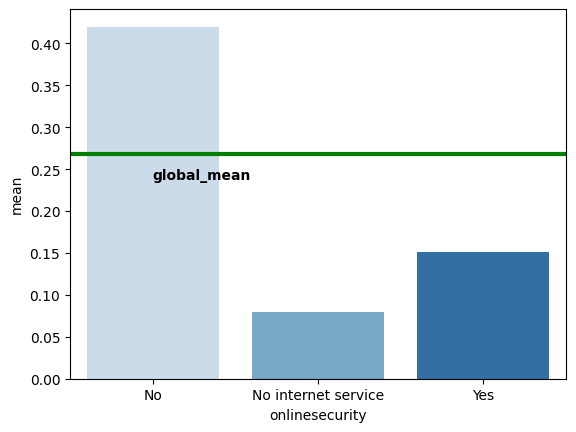

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


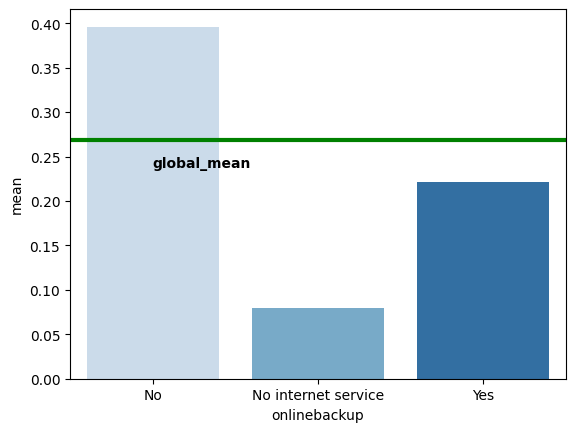

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


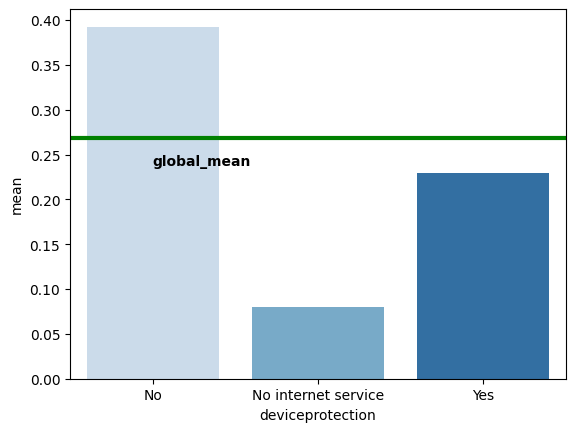

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


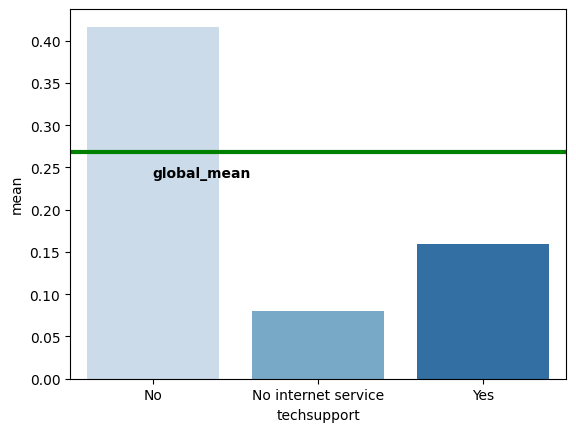

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


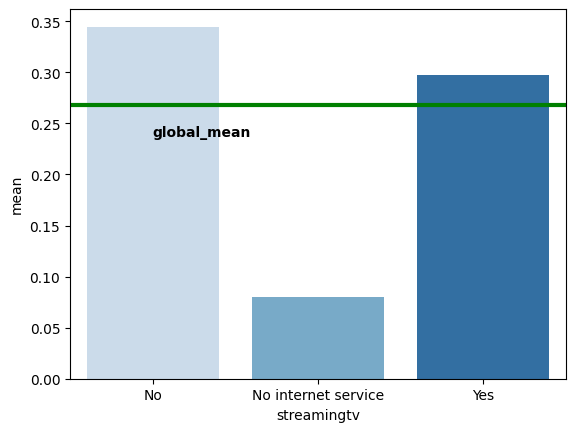

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


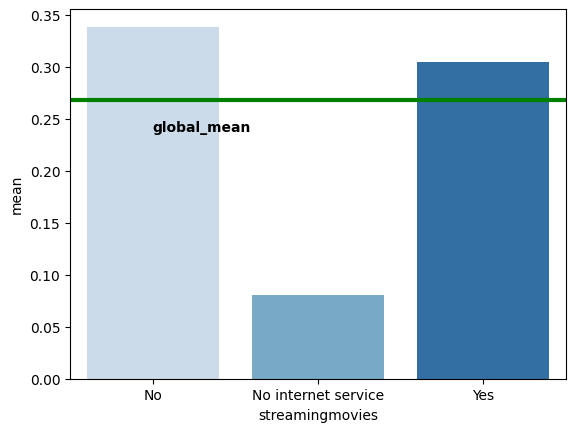

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


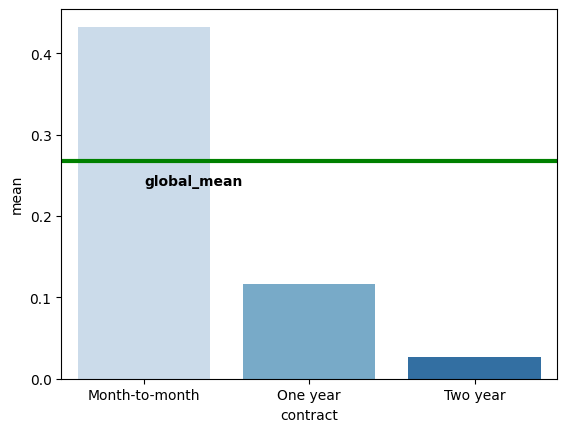

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


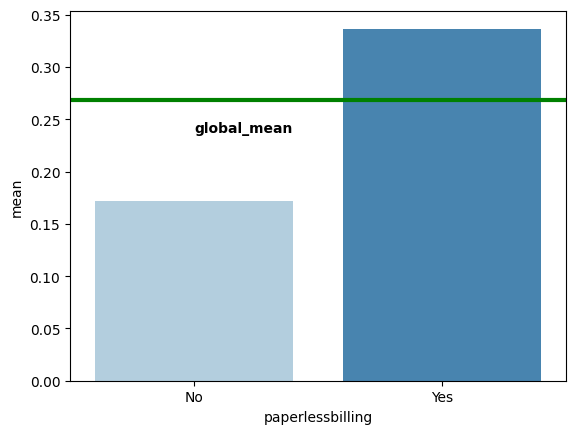

<ipython-input-29-8d91ff229582>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')


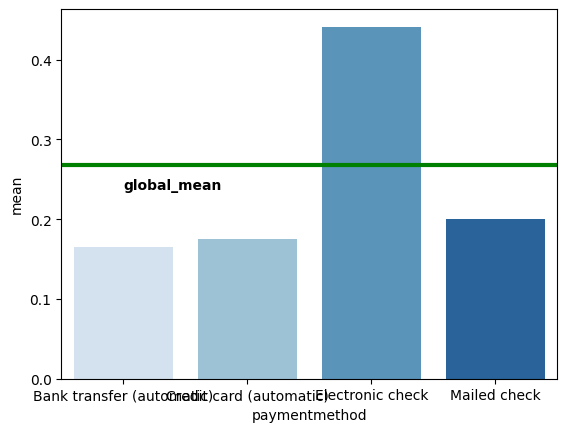

In [ ]:
import seaborn as sns
for feature in categorical:
    df_group = df_train.groupby(by=feature).churn.agg(['mean']).reset_index()
    graph=sns.barplot(x= feature, y = 'mean', data=df_group, palette='Blues')
    graph.axhline(global_mean, linewidth=3, color='g')
    plt.text(0, global_mean - 0.03, "global_mean", color='black', weight='semibold')
    plt.show()

In [ ]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train.churn)

df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head())
display(df_mi.tail())

,MI
contract,0.100378
onlinesecurity,0.062802
techsupport,0.059945
internetservice,0.053951
onlinebackup,0.044230


,MI
partner,0.009443
seniorcitizen,0.008396
multiplelines,0.000821
gender,0.000099
phoneservice,0.000098


In [ ]:
df[numerical].corrwith(df.churn)

,0
tenure,-0.352229
monthlycharges,0.193356
totalcharges,-0.199037


<ipython-input-32-d1f7537cd537>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');


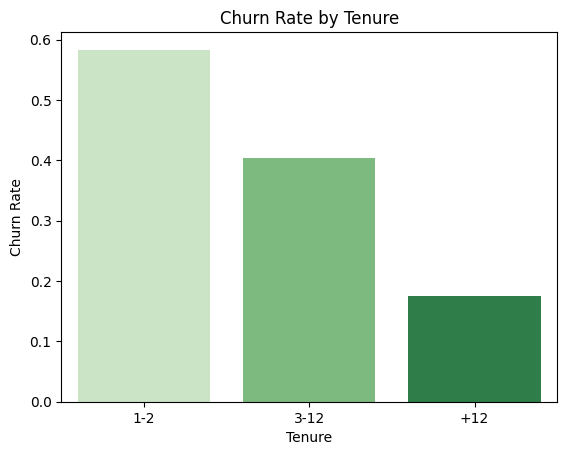

In [ ]:
t1 =df[df['tenure'] <= 2].churn.mean()
t2 = df[(df.tenure >= 3) & (df.tenure <= 12)].churn.mean()
t3 = df[df['tenure'] >= 12].churn.mean()
sns.barplot(x =['1-2', '3-12', '+12'], y =[t1,t2,t3], palette='Greens');
plt.title('Churn Rate by Tenure');
plt.xlabel('Tenure');
plt.ylabel('Churn Rate');

<ipython-input-33-070981db1004>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');


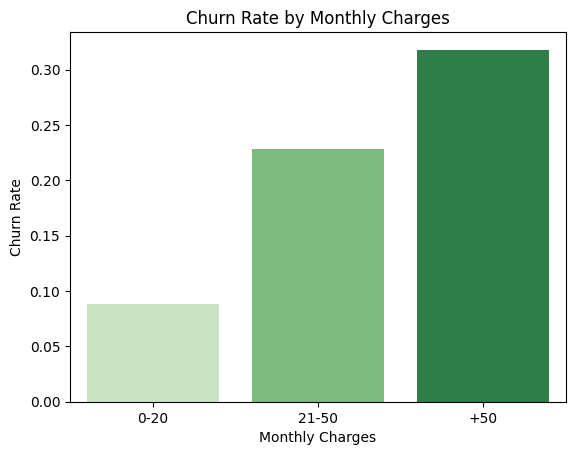

In [ ]:
mc1 =df[df['monthlycharges'] <= 20].churn.mean()
mc2 = df[(df.monthlycharges >= 21) & (df.monthlycharges <= 50)].churn.mean()
mc3 = df[df['monthlycharges'] > 50].churn.mean()
sns.barplot(x =['0-20', '21-50', '+50'], y =[mc1,mc2,mc3], palette='Greens');
plt.title('Churn Rate by Monthly Charges');
plt.xlabel('Monthly Charges');
plt.ylabel('Churn Rate');

<ipython-input-34-78fb88f813a1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');


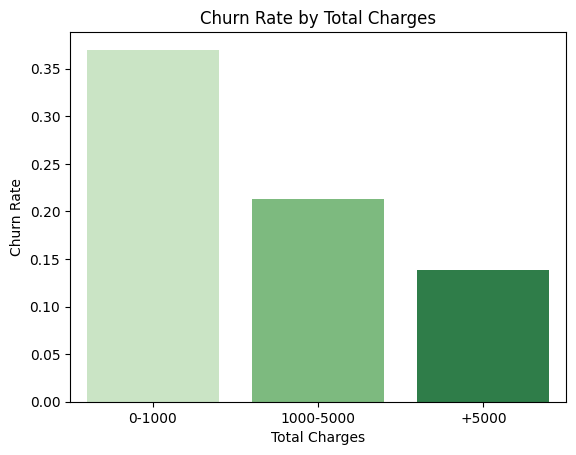

In [ ]:
tc1 = df[df['totalcharges'] <= 1000].churn.mean()
tc2 = df[(df.totalcharges > 1000) & (df.totalcharges <= 5000)].churn.mean()
tc3 = df[df['totalcharges'] > 5000].churn.mean()
sns.barplot(x =['0-1000', '1000-5000', '+5000'], y =[tc1,tc2,tc3], palette='Greens');
plt.title('Churn Rate by Total Charges');
plt.xlabel('Total Charges');
plt.ylabel('Churn Rate');

In [ ]:
# Transformers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
def preprocess(df_train, df_valid, df_test, num, cat):
    # Define transformers
    ohe = OneHotEncoder(drop='first')
    scaler = StandardScaler()

    transformer = make_column_transformer((scaler, num),
                                           (ohe, cat),
                                          remainder='passthrough',verbose_feature_names_out=False)
    # Fitting & Transformation
    X_train = transformer.fit_transform(df_train[cat+num])
    X_valid = transformer.transform(df_valid[cat+num])
    X_test = transformer.transform(df_test[cat+num])
    columns=transformer.get_feature_names_out()

    return X_train , X_valid, X_test, columns,transformer

In [ ]:
X_train , X_valid, X_test, columns,transformer = preprocess(df_train, df_valid, df_test, numerical, categorical)

In [ ]:
columns = transformer.get_feature_names_out()
print(columns)


['tenure' 'monthlycharges' 'totalcharges' 'gender_Male' 'seniorcitizen_1'
 'partner_Yes' 'dependents_Yes' 'phoneservice_Yes'
 'multiplelines_No phone service' 'multiplelines_Yes'
 'internetservice_Fiber optic' 'internetservice_No'
 'onlinesecurity_No internet service' 'onlinesecurity_Yes'
 'onlinebackup_No internet service' 'onlinebackup_Yes'
 'deviceprotection_No internet service' 'deviceprotection_Yes'
 'techsupport_No internet service' 'techsupport_Yes'
 'streamingtv_No internet service' 'streamingtv_Yes'
 'streamingmovies_No internet service' 'streamingmovies_Yes'
 'contract_One year' 'contract_Two year' 'paperlessbilling_Yes'
 'paymentmethod_Credit card (automatic)' 'paymentmethod_Electronic check'
 'paymentmethod_Mailed check']


In [ ]:
X_train


array([[-0.08151035, -1.48282956, -0.71846292, ...,  0.        ,
         0.        ,  1.        ],
       [-0.36657522,  0.64606159, -0.17334564, ...,  0.        ,
         1.        ,  0.        ],
       [-0.7330872 ,  1.04657898, -0.39748501, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.22176983,  0.85379883, -0.91205098, ...,  1.        ,
         0.        ,  0.        ],
       [-0.20368101, -1.32328737, -0.65753831, ...,  0.        ,
         1.        ,  0.        ],
       [-0.93670496,  0.54967152, -0.66212211, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
y_train = df_train['churn']
y_valid = df_valid['churn']
y_test = df_test['churn']

In [ ]:
pip install --upgrade xgboost


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, solver='liblinear')
logreg_model.fit(X_train, y_train)

# Predict with the model
y_pred = logreg_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.808374733853797
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      1061
           1       0.62      0.59      0.60       348

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
import joblib

# Save the Logistic Regression model
joblib.dump(logreg_model, "logreg_model.pkl")


['logreg_model.pkl']

In [ ]:
import pickle

# Save the whole transformer (scaler + one-hot encoder)
with open('transformer.pkl', 'wb') as file:
    pickle.dump(transformer, file)


In [ ]:
import pickle

# Save the best model to a file
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(logreg_model, file)


In [ ]:
user_input = {
    'gender': 'Female',
    'seniorcitizen': 0,
    'partner': 'Yes',
    'dependents': 'No',
    'tenure': 1,
    'phoneservice': 'Yes',
    'multiplelines': 'No phone service',
    'internetservice': 'DSL',
    'onlinesecurity': 'No',
    'onlinebackup': 'No',
    'deviceprotection': 'No',
    'techsupport': 'No',
    'streamingtv': 'No',
    'streamingmovies': 'No',
    'contract': 'Month-to-month',
    'paperlessbilling': 'Yes',
    'paymentmethod': 'Electronic check',
    'monthlycharges': 29.85,
    'totalcharges': 29.85,
    'churn': 'No'
}


In [ ]:
!pip install streamlit -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pickle
import pandas as pd
import plotly.graph_objects as go
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


st.set_page_config(layout="wide")
with open('logreg_model.pkl', 'rb') as file:
    model = pickle.load(file)
with open('transformer.pkl', 'rb') as file:
    transformer = pickle.load(file)
categorical_features = [
    'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines',
    'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
    'techsupport', 'streamingtv', 'streamingmovies', 'contract',
    'paperlessbilling', 'paymentmethod', 'churn'
]
numerical_features = ['tenure', 'monthlycharges', 'totalcharges']
category_options = {
    'gender': ['Female', 'Male'],
    'seniorcitizen': [0, 1],
    'partner': ['Yes', 'No'],
    'dependents': ['Yes', 'No'],
    'phoneservice': ['Yes', 'No'],
    'multiplelines': ['No phone service', 'No', 'Yes'],
    'internetservice': ['DSL', 'Fiber optic', 'No'],
    'onlinesecurity': ['Yes', 'No', 'No internet service'],
    'onlinebackup': ['Yes', 'No', 'No internet service'],
    'deviceprotection': ['Yes', 'No', 'No internet service'],
    'techsupport': ['Yes', 'No', 'No internet service'],
    'streamingtv': ['Yes', 'No', 'No internet service'],
    'streamingmovies': ['Yes', 'No', 'No internet service'],
    'contract': ['Month-to-month', 'One year', 'Two year'],
    'paperlessbilling': ['Yes', 'No'],
    'paymentmethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
    'churn': ['Yes', 'No']
}

default_values = {
    'gender': 'Female',
    'seniorcitizen': 0,
    'partner': 'Yes',
    'dependents': 'No',
    'phoneservice': 'Yes',
    'multiplelines': 'No phone service',
    'internetservice': 'DSL',
    'onlinesecurity': 'No',
    'onlinebackup': 'Yes',
    'deviceprotection': 'Yes',
    'techsupport': 'No',
    'streamingtv': 'No',
    'streamingmovies': 'No',
    'contract': 'Month-to-month',
    'paperlessbilling': 'Yes',
    'paymentmethod': 'Electronic check',
    'churn': 'No',
    'tenure': 10,
    'monthlycharges': 60.0,
    'totalcharges': 600.0
}

def create_gauge_chart(churn_probability):
    """Create a speedometer-like gauge chart using plotly"""

    colors = [
        '#00B050',
        '#FFA500',
        '#FF0000'
    ]

    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=churn_probability * 100,
        domain={'x': [0, 0.3], 'y': [0, 1]},
        gauge={
            'axis': {'range': [0, 100], 'tickwidth': 1},
            'bar': {'color': "darkgray"},
            'steps': [
                {'range': [0, 30], 'color': colors[0]},
                {'range': [30, 65], 'color': colors[1]},
                {'range': [65, 100], 'color': colors[2]}
            ],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': churn_probability * 100
            }
        },
        title={'text': "Churn Risk", 'font': {'size': 15}}
    ))

    fig.update_layout(
        height=180,
        width=180,
        margin=dict(l=420, r=0, t=50, b=5),
        paper_bgcolor="#0E1117",
        plot_bgcolor="#0E1117",
        font={'color': "white", 'family': "Arial"}
    )

    return fig

st.markdown("""
    <style>
        .block-container {
            padding-top: 1rem;
            padding-bottom: 0rem;
        }
        .element-container {
            margin-bottom: 0px;
        }
        .stButton>button {
            margin-bottom: 0rem;
        }
        div[data-testid="stVerticalBlock"] > div:first-of-type {
            margin-bottom: 0rem;
        }
    </style>
""", unsafe_allow_html=True)

st.title("Customer Churn Prediction")
st.sidebar.header("User Inputs")

# user inputs
user_inputs = {}
for feature in categorical_features:
    if feature == 'seniorcitizen':
        user_inputs[feature] = st.sidebar.selectbox(
            feature,
            options=category_options[feature],
            index=category_options[feature].index(default_values[feature]),
            format_func=lambda x: 'Yes' if x == 1 else 'No'
        )
    elif feature in category_options:
        user_inputs[feature] = st.sidebar.selectbox(
            feature,
            options=category_options[feature],
            index=category_options[feature].index(default_values[feature])
        )

for feature in numerical_features:
    user_inputs[feature] = st.sidebar.number_input(
        feature,
        value=default_values[feature],
        step=1 if feature == 'tenure' else 0.01
    )

input_data = pd.DataFrame([user_inputs])
input_data['seniorcitizen'] = input_data['seniorcitizen'].astype('object')

# preprocessing using the transformer
input_data_transformed = transformer.transform(input_data)

# Prediction Section
st.header("Prediction")
if st.button("Predict"):
    probabilities = model.predict_proba(input_data_transformed)[0]
    churn_prob = probabilities[1]

    gauge_chart = create_gauge_chart(churn_prob)
    st.plotly_chart(gauge_chart, use_container_width=True)
    st.markdown('<div class="prediction-card">', unsafe_allow_html=True)
    st.write(f"Probability of Churn: {probabilities[1]:.2%}")
    st.write(f"Probability of Retention: {probabilities[0]:.2%}")
    st.markdown('</div>', unsafe_allow_html=True)
    if churn_prob * 100 < 30:
        st.success(f"### Final Prediction: **Low Churn Risk**")
    elif churn_prob * 100 < 65:
        st.warning(f"### Final Prediction: **Moderate Churn Risk**")
    else:
        st.error(f"### Final Prediction: **High Churn Risk**")

2025-01-16 18:28:35.110 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 18:28:35.128 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 18:28:35.330 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-16 18:28:35.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 18:28:35.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 18:28:35.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 18:28:35.357 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn